This is a simple notebook that replicates https://mrf-web.readthedocs.io/en/latest/usage.html#usage

In [1]:
# needs correcting as the documentation a from MRF import *
from MacroRandomForest import *
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Number of rows
n = 1000

# Create normally distributed data for each column
data = {
    'sim_y': np.random.normal(0, 1, n),
    'sim_x1': np.random.normal(0, 1, n),
    'sim_x2': np.random.normal(0, 1, n),
    'sim_x3': np.random.normal(0, 1, n),
    'sim_x4': np.random.normal(0, 1, n),
    'sim_x5': np.random.normal(0, 1, n),
    'sim_x6': np.random.normal(0, 1, n),
    'sim_x7': np.random.normal(0, 1, n),
    'sim_x8': np.random.normal(0, 1, n),
    'sim_x9': np.random.normal(0, 1, n),
    'sim_x10': np.random.normal(0, 1, n),
    'sim_x11': np.random.normal(0, 1, n),
    'sim_x12': np.random.normal(0, 1, n),
    'sim_x13': np.random.normal(0, 1, n),
    'sim_x14': np.random.normal(0, 1, n),
    'sim_x15': np.random.normal(0, 1, n),
    'trend': np.random.normal(0, 1, n)
}

# Create the DataFrame
simulated_data = pd.DataFrame(data)

# Display the first few rows of the DataFrame
print(simulated_data.head())

# Display basic information about the DataFrame
print(simulated_data.info())


      sim_y    sim_x1    sim_x2    sim_x3    sim_x4    sim_x5    sim_x6  \
0  0.496714  1.399355 -0.675178 -1.907808 -0.863494 -0.423760 -1.114081   
1 -0.138264  0.924634 -0.144519 -0.860385 -0.031203 -0.453414 -0.630931   
2  0.647689  0.059630 -0.792420 -0.413606  0.018017 -1.795643 -0.942060   
3  1.523030 -0.646937 -0.307962  1.887688  0.472630 -0.330090 -0.547996   
4 -0.234153  0.698223 -1.893615  0.556553 -1.366858  0.732829 -0.214150   

     sim_x7    sim_x8    sim_x9   sim_x10   sim_x11   sim_x12   sim_x13  \
0  0.785185 -0.033025  0.765402 -0.678495 -1.178180  1.174814  0.011736   
1 -1.777681 -0.503650  1.073413 -0.305499  0.432850 -1.878981  0.527439   
2  0.714746 -0.172375  0.498690 -0.597381  1.110753 -0.327795 -1.611003   
3 -0.233724  0.714732 -1.942498  0.110418  0.755185 -0.041660 -0.919898   
4  0.707458  1.277857 -0.155422  1.197179  1.084478  0.015909 -0.148179   

    sim_x14   sim_x15     trend  
0 -0.224241 -0.143423  0.879307  
1 -0.210835 -0.032656  0.03930

In [24]:
simulated_data = pd.read_csv('final_dataset.csv', index_col=0)
simulated_data['trend'] = np.arange(1, len(simulated_data) + 1)
simulated_data.reset_index(drop=True, inplace=True)
simulated_data.head()
# there is a problem with the data - the dependent variable should be the first column
# Move the 'gdp' column to the first position
gdp_column = simulated_data.pop('gdp')
simulated_data.insert(0, 'gdp', gdp_column)
simulated_data

,gdp,inflation,government_expenditure,Rate,employment,balance_of_payments,trend
0,401790,2.1,24697.0,5.94,70.9,-956,1
1,401790,2.1,24882.0,6.25,71.0,-956,2
2,401790,2.1,26728.0,6.50,70.9,-956,3
3,405233,2.4,25821.0,6.75,70.9,-190,4
4,405233,2.3,25954.0,7.00,71.1,-190,5
...,...,...,...,...,...,...,...
320,631825,4.2,87443.0,5.25,74.8,-11141,321
321,636222,4.2,101864.0,5.25,74.5,-13760,322
322,636222,3.8,89587.0,5.25,74.5,-13760,323
323,636222,3.8,104766.0,5.25,74.3,-13760,324


In [20]:
### Dependent Variable
my_var = "gdp"
y_pos = simulated_data.columns.get_loc(my_var)

### Exogenous Variables
# S_vars = [f"sim_x{i}" for i in range(1, 16)] + ['trend']
S_vars = simulated_data.columns.tolist()
S_vars.remove(my_var)
S_pos = [simulated_data.columns.get_loc(s) for s in S_vars]

### Variables Included in Linear Equation
x_vars = ["inflation", 'government_expenditure', 'Rate']
x_pos = [simulated_data.columns.get_loc(x) for x in x_vars]

In [21]:
oos_pos = np.arange(len(simulated_data) - 12 , len(simulated_data)) # lower should be oos start, upper the length of your dataset

In [44]:
y_pos = np.atleast_1d(y_pos)
x_pos = np.atleast_1d(x_pos)
S_pos = np.atleast_1d(S_pos)
oos_pos = np.atleast_1d(oos_pos)

MRF = MacroRandomForest(data = simulated_data,
                        y_pos = y_pos,
                        x_pos = x_pos,
                        S_pos = S_pos,
                        B = 100, # number of trees
                        parallelise = True,
                        n_cores = 1,
                        resampling_opt = 2,
                        oos_pos = oos_pos,
                        trend_push = 4,
                        quantile_rate = 0.3,
                        print_b = True,
                        fast_rw = True)

In [ ]:
MRF_output = MRF._ensemble_loop()

Tree 1 out of 100
Tree 2 out of 100
Tree 3 out of 100
Tree 4 out of 100
Tree 5 out of 100
Tree 6 out of 100
Tree 7 out of 100
Tree 8 out of 100
Tree 9 out of 100
Tree 10 out of 100
Tree 11 out of 100


In [37]:
forecasts = MRF_output['pred']
betas = MRF_output['betas']

Text(0.5, 1.0, 'OOS predictions of MRF')

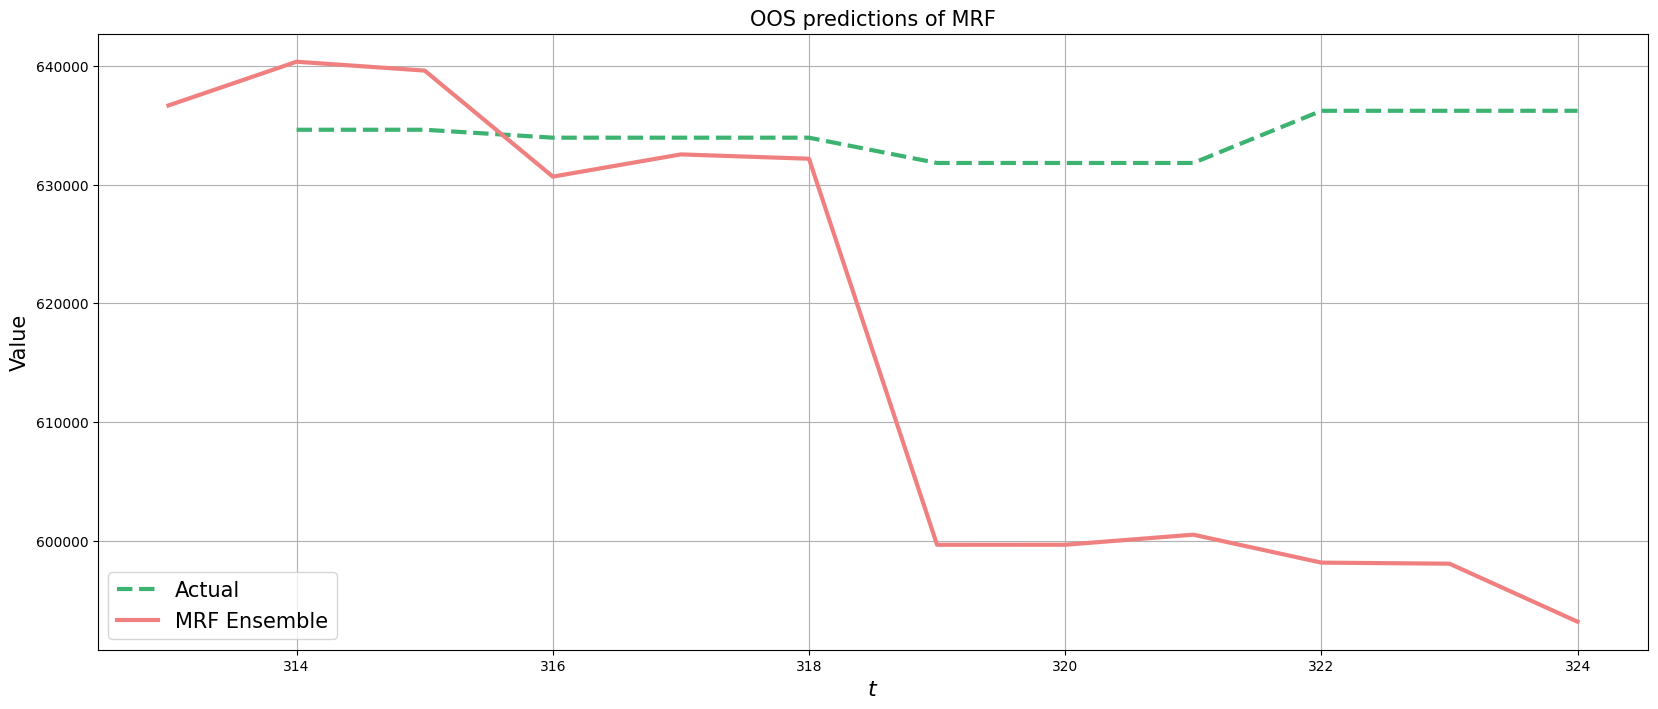

In [42]:
fig, ax = plt.subplots()
plt.rcParams['figure.figsize'] = (20, 8)

# Plotting actual versus original
# column names has dissapeared

ax.plot(simulated_data.iloc[oos_pos, 0].shift(1), label='Actual', linewidth=3, color='mediumseagreen', linestyle='--')
ax.plot(forecasts, color='lightcoral', linewidth=3, label='MRF Ensemble')

ax.legend(fontsize = 15)
ax.set_ylabel("Value", fontsize = 15)
ax.grid()
ax.set_xlabel(r"$t$", fontsize = 16)
ax.set_title("OOS predictions of MRF", fontsize = 15)

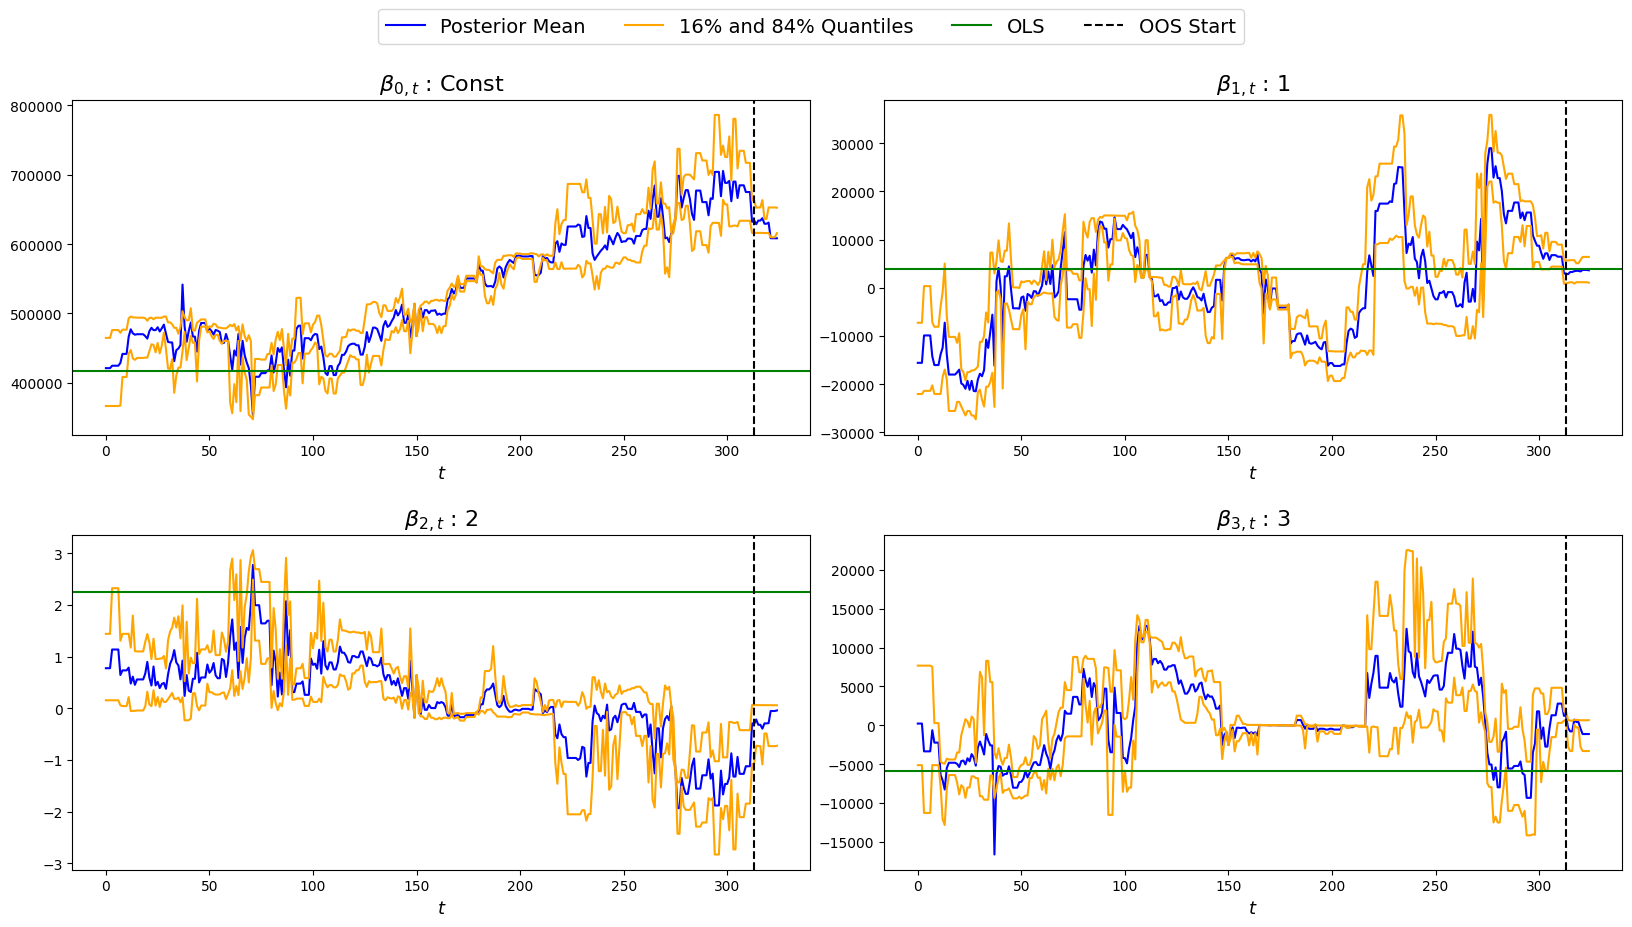

In [43]:
MRF.band_plots()